In [1]:
# import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# crate a set of random latitude and longitud combinations
lats=np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs=np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# add latitud and longitud to a list
coordinates=list(lat_lngs)

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [5]:
#impot citipy
from citipy import citipy

In [6]:
# create a list for holding the cities
cities=[]
# identify the nearest city for each latitudes and longitudes combinations.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # if the city is unique then we will add to the list.
    if city not in cities:
        cities.append(city)
        

# print the city count to confirm sufficient count.
len(cities)

636

In [7]:
#import the request library
import requests

#import weather api key
from config import weather_api_key

#build the url for Weather Map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=95f8ebe0e353bddd04e04cd2e3341b65


In [8]:
# import the datatime module from the datatime library. 
from datetime import datetime

In [9]:
# create an empty list to hold the weather data.
city_data = []

#print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("------------------------")

#create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

#Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in set of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    #log the URL, record, and set numbers and the city.
    print(f"Prossing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count.
    record_count += 1

# run an api request for each of the cities.
    try:
        #parse the json and retirve the data.
        city_weather = requests.get(city_url).json()
    
        #parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]

        #covert the data to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

        #Append the information into the city_data list.
        city_data.append({"City": city.title(), "Lat": city_lat, "Lng": city_lng, "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
# if an error is experienced skip the city.
    except:
        print("city not found. Skipping...")
        pass
    
# indicate the data loading is complete.
print("---------------------------")
print("Data Retrieval complete    ")
print("---------------------------")


Beginning Data Retrieval   
------------------------
Prossing Record 1 of Set 13 | laguna
Prossing Record 2 of Set 13 | antofagasta
Prossing Record 3 of Set 13 | hlotse
Prossing Record 4 of Set 13 | busselton
Prossing Record 5 of Set 13 | rikitea
Prossing Record 6 of Set 13 | kapaa
Prossing Record 7 of Set 13 | wyndham
Prossing Record 8 of Set 13 | grong
Prossing Record 9 of Set 13 | bur gabo
city not found. Skipping...
Prossing Record 10 of Set 13 | hithadhoo
Prossing Record 11 of Set 13 | chokurdakh
Prossing Record 12 of Set 13 | waddan
Prossing Record 13 of Set 13 | pathalgaon
Prossing Record 14 of Set 13 | ponta do sol
Prossing Record 15 of Set 13 | boa vista
Prossing Record 16 of Set 13 | ushuaia
Prossing Record 17 of Set 13 | punta arenas
Prossing Record 18 of Set 13 | lovozero
Prossing Record 19 of Set 13 | kavaratti
Prossing Record 20 of Set 13 | saleaula
city not found. Skipping...
Prossing Record 21 of Set 13 | shenjiamen
Prossing Record 22 of Set 13 | sovetsk
Prossing Record

Prossing Record 45 of Set 16 | tuktoyaktuk
Prossing Record 46 of Set 16 | verkhnyaya toyma
Prossing Record 47 of Set 16 | ahmadnagar
Prossing Record 48 of Set 16 | zheleznodorozhnyy
Prossing Record 49 of Set 16 | burica
city not found. Skipping...
Prossing Record 50 of Set 16 | sorland
Prossing Record 1 of Set 17 | faanui
Prossing Record 2 of Set 17 | karlskoga
Prossing Record 3 of Set 17 | keti bandar
Prossing Record 4 of Set 17 | milkovo
Prossing Record 5 of Set 17 | saskylakh
Prossing Record 6 of Set 17 | iracoubo
Prossing Record 7 of Set 17 | ballina
Prossing Record 8 of Set 17 | sibu
Prossing Record 9 of Set 17 | husavik
Prossing Record 10 of Set 17 | illoqqortoormiut
city not found. Skipping...
Prossing Record 11 of Set 17 | swift current
Prossing Record 12 of Set 17 | ancud
Prossing Record 13 of Set 17 | lashio
Prossing Record 14 of Set 17 | dali
Prossing Record 15 of Set 17 | cherskiy
Prossing Record 16 of Set 17 | ust-kamchatsk
city not found. Skipping...
Prossing Record 17 of

Prossing Record 41 of Set 20 | olinda
Prossing Record 42 of Set 20 | roebourne
Prossing Record 43 of Set 20 | kijang
Prossing Record 44 of Set 20 | masumbwe
Prossing Record 45 of Set 20 | lazaro cardenas
Prossing Record 46 of Set 20 | torbay
Prossing Record 47 of Set 20 | rundu
Prossing Record 48 of Set 20 | vanimo
Prossing Record 49 of Set 20 | regina
Prossing Record 50 of Set 20 | birjand
Prossing Record 1 of Set 21 | kamina
Prossing Record 2 of Set 21 | el faiyum
city not found. Skipping...
Prossing Record 3 of Set 21 | marfino
Prossing Record 4 of Set 21 | khonuu
city not found. Skipping...
Prossing Record 5 of Set 21 | lagoa
Prossing Record 6 of Set 21 | jutai
Prossing Record 7 of Set 21 | gorontalo
Prossing Record 8 of Set 21 | olafsvik
Prossing Record 9 of Set 21 | pavlodar
Prossing Record 10 of Set 21 | jiroft
city not found. Skipping...
Prossing Record 11 of Set 21 | merauke
Prossing Record 12 of Set 21 | tiksi
Prossing Record 13 of Set 21 | celestun
Prossing Record 14 of Set 

Prossing Record 33 of Set 24 | buchanan
Prossing Record 34 of Set 24 | san policarpo
Prossing Record 35 of Set 24 | tukrah
Prossing Record 36 of Set 24 | puerto carreno
Prossing Record 37 of Set 24 | lyskovo
Prossing Record 38 of Set 24 | fort saint john
city not found. Skipping...
Prossing Record 39 of Set 24 | valparaiso
Prossing Record 40 of Set 24 | tsihombe
city not found. Skipping...
Prossing Record 41 of Set 24 | miloslavskoye
Prossing Record 42 of Set 24 | canandaigua
Prossing Record 43 of Set 24 | aleksandrovka
Prossing Record 44 of Set 24 | cairns
Prossing Record 45 of Set 24 | cisarua
Prossing Record 46 of Set 24 | sesheke
Prossing Record 47 of Set 24 | hutchinson
Prossing Record 48 of Set 24 | ola
Prossing Record 49 of Set 24 | port blair
Prossing Record 50 of Set 24 | hvide sande
Prossing Record 1 of Set 25 | ixtapa
Prossing Record 2 of Set 25 | urdzhar
city not found. Skipping...
Prossing Record 3 of Set 25 | kusk
city not found. Skipping...
Prossing Record 4 of Set 25 | 

In [15]:
# convert the array of dictionaries to a Pandas DataFrame

city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Laguna,38.4210,-121.4238,85.82,47,1,1.01,US,2021-06-01 06:44:49
1,Antofagasta,-23.6500,-70.4000,58.28,72,1,0.81,CL,2021-06-01 06:44:49
2,Hlotse,-28.8718,28.0450,42.12,75,50,3.40,LS,2021-06-01 06:44:49
3,Busselton,-33.6500,115.3333,63.09,70,95,4.59,AU,2021-06-01 06:44:49
4,Rikitea,-23.1203,-134.9692,72.39,70,5,22.26,PF,2021-06-01 06:44:50
5,Kapaa,22.0752,-159.3190,80.58,81,40,3.15,US,2021-06-01 06:44:50
6,Wyndham,37.6985,-77.6125,56.46,92,1,4.32,US,2021-06-01 06:44:50
7,Grong,64.4654,12.3149,58.42,46,85,4.90,NO,2021-06-01 06:44:50
8,Hithadhoo,-0.6000,73.0833,84.43,66,89,16.75,MV,2021-06-01 06:44:51
9,Chokurdakh,70.6333,147.9167,71.15,22,91,13.44,RU,2021-06-01 06:44:51


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [20]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Laguna,US,2021-06-01 06:44:49,38.4210,-121.4238,85.82,47,1,1.01
1,Antofagasta,CL,2021-06-01 06:44:49,-23.6500,-70.4000,58.28,72,1,0.81
2,Hlotse,LS,2021-06-01 06:44:49,-28.8718,28.0450,42.12,75,50,3.40
3,Busselton,AU,2021-06-01 06:44:49,-33.6500,115.3333,63.09,70,95,4.59
4,Rikitea,PF,2021-06-01 06:44:50,-23.1203,-134.9692,72.39,70,5,22.26


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame fro plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

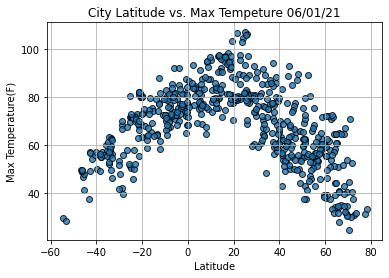

In [32]:
# import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Tempeture "+ time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

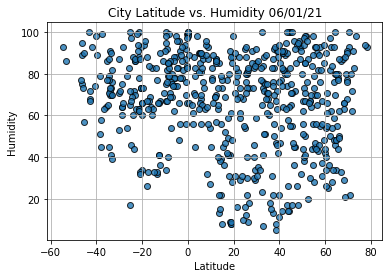

In [34]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

#Show plot.
plt.show()

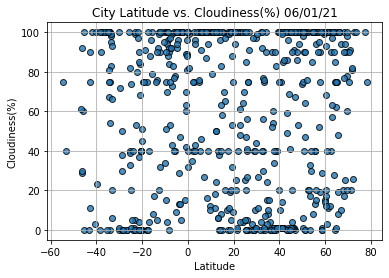

In [37]:
# Build the scatter plot for latitude vs. clodiness.
plt.scatter(lats, 
           cloudiness, 
           edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitude vs. Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

#Show plot.
plt.show()

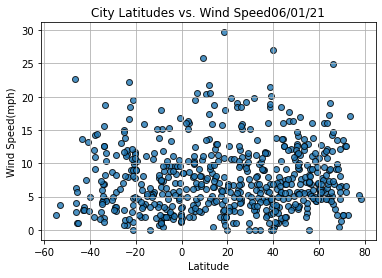

In [40]:
# Build the scatter plot for latitude vs. Wind speed.
plt.scatter(lats, 
            wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate other graph properties.
plt.title(f"City Latitudes vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

#Show plot.
plt.show()